#CNN

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ckay16/accident-detection-from-cctv-footage")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1"

for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    for name in dirs:
        print(f"  Subdirectory: {name}")
    for name in files:
        print(f"  File: {name}")

Directory: /root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1
  Subdirectory: data
Directory: /root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data
  Subdirectory: val
  Subdirectory: test
  Subdirectory: train
Directory: /root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/val
  Subdirectory: Non Accident
  Subdirectory: Accident
Directory: /root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/val/Non Accident
  File: test25_22.jpg
  File: test28_13.jpg
  File: test25_17.jpg
  File: test15_27.jpg
  File: test9_6.jpg
  File: test3_5.jpg
  File: test20_7.jpg
  File: test_22.jpg
  File: test30_5.jpg
  File: test9_15.jpg
  File: test24_1.jpg
  File: test10_3.jpg
  File: test26_2.jpg
  File: test4_21.jpg
  File: test4_14.jpg
  File: test15_18.jpg
  File: 5_22.jpg
  File: test11_49.jpg
  File: test4_2.jpg
  File: test3_25.jpg
  File: test9_8.

In [ ]:
import tensorflow as tf

train_dir = "/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/train"
val_dir = "/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/val"
test_dir = "/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/test"

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Resize images to this size
    batch_size=32,         # Batch size
    label_mode='binary'  # Or 'binary' depending on the use case
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)


Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


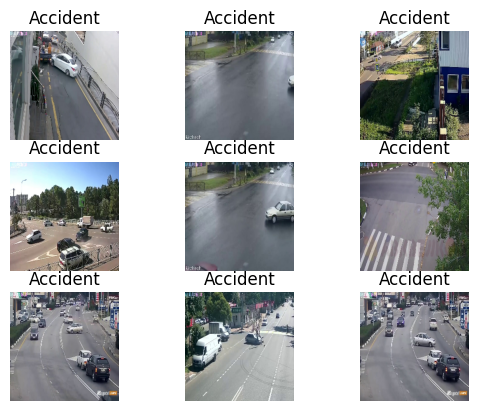

In [ ]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")
    plt.show()

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.5070 - loss: 1.2285 - val_accuracy: 0.7143 - val_loss: 0.6608
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.6505 - loss: 0.6532 - val_accuracy: 0.7449 - val_loss: 0.6026
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.6739 - loss: 0.6020 - val_accuracy: 0.7143 - val_loss: 0.5103
Epoch 4/10


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 614ms/step - accuracy: 0.6512 - loss: 0.5832
Test Accuracy: 68.00%


# CNN Trial 2

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tr_data_dir = "/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/train"
tr_data = tf.keras.utils.image_dataset_from_directory(tr_data_dir,image_size=(256, 256),seed = 12332)

Found 791 files belonging to 2 classes.


In [ ]:
tr_data_iterator = tr_data.as_numpy_iterator()
tr_batch = tr_data_iterator.next()

In [ ]:
len(tr_batch[0])

32

In [ ]:
def label_to_category(label):
    if(label == 1):
        return "No Accident"
    elif label == 0:
        return "Accident"
    else :
        return "error"

In [ ]:
cols = 4
rows = 4
fig, ax = plt.subplots(nrows= rows , ncols= cols,figsize=(15,15),layout='constrained')
fig.tight_layout(pad=2)




for outer_index, img in enumerate(tr_batch[0][:]):
    if outer_index >= rows*cols:
        break

    if (outer_index % cols == 0):
        for inner_index, img in enumerate(tr_batch[0][outer_index:outer_index+cols]):


            ax[outer_index//cols][inner_index].imshow(img.astype(int))

            label = label_to_category(tr_batch[1][outer_index + inner_index])


            ax[outer_index//cols][inner_index].set_aspect(1)

            num_label = tr_batch[1][outer_index + inner_index]

            ax[outer_index//cols][inner_index].axis("off")
            ax[outer_index//cols][inner_index].title.set_text(label)


plt.savefig("test.png")
plt.show()

Preprocessing Data

In [ ]:
tr_data = tr_data.map(lambda x,y: (x/255, y))

In [ ]:
tr_batch = tr_data.as_numpy_iterator().next()

In [ ]:
print("Max pixel value : ",tr_batch[0].max())
print("Min pixel value : ",tr_batch[0].min())

Max pixel value :  1.0
Min pixel value :  0.0


In [ ]:
cols = 4
rows = 4
fig, ax = plt.subplots(nrows= rows , ncols= cols,figsize=(15,15),layout='constrained')
fig.tight_layout(pad=2)




for outer_index, img in enumerate(tr_batch[0][:]):
    if outer_index >= rows*cols:
        break

    if (outer_index % cols == 0):
        for inner_index, img in enumerate(tr_batch[0][outer_index:outer_index+cols]):


            ax[outer_index//cols][inner_index].imshow(img)
            if(tr_batch[1][outer_index + inner_index] == 0):
               label = " Accident"
            else: label = " No Accident"




            ax[outer_index//cols][inner_index].set_aspect(1)

            num_label = tr_batch[1][outer_index + inner_index]

            ax[outer_index//cols][inner_index].axis("off")
            ax[outer_index//cols][inner_index].title.set_text(label)


plt.savefig("test.png")
plt.show()

In [ ]:
val_data_dir = "/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/val"
val_data = tf.keras.utils.image_dataset_from_directory(val_data_dir)
val_data_iterator = val_data.as_numpy_iterator()
val_batch = val_data_iterator.next()

Found 98 files belonging to 2 classes.


In [ ]:
# Normalizing Validation data
val_data = val_data.map(lambda x,y: (x/255, y))
val_batch = val_data.as_numpy_iterator().next()

Mdel Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# Adding neural Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [ ]:
# setting up for logging
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Number of epochs with no improvement after which to stop
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Train the model with EarlyStopping
hist = model.fit(tr_data,
                 epochs=20,
                 validation_data=val_data,
                 callbacks=[tensorboard_callback, early_stopping])

# Save the trained model
model.save("/content/drive/MyDrive/RoadSafe Model/accidents.keras")

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9189 - loss: 0.2098 - val_accuracy: 0.8367 - val_loss: 0.3955
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9218 - loss: 0.1991 - val_accuracy: 0.8980 - val_loss: 0.2090
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9378 - loss: 0.1705 - val_accuracy: 0.8980 - val_loss: 0.2528
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9556 - loss: 0.1120 - val_accuracy: 0.8980 - val_loss: 0.2624
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9625 - loss: 0.0880 - val_accuracy: 0.9388 - val_loss: 0.1633
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9764 - loss: 0.1035 - val_accuracy: 0.8980 - val_loss: 0.3708
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9744 - loss: 0.0823 - val_accuracy: 0.8673 - val_loss: 0.5145
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.9730 - loss: 0.1266 - val_accuracy: 0.8980 - val_loss:

In [ ]:
import tensorflow as tf
import os

# Define test data directory
test_data_dir = "/root/.cache/kagglehub/datasets/ckay16/accident-detection-from-cctv-footage/versions/1/data/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)

# Convert test dataset to numpy iterator
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

# Define metrics
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

# Loop through test dataset
for batch in test_data:
    X, y = batch
    yhat = model.predict(X)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)  # Update accuracy metric

# Compute F1-score
def F1_score(precision, recall):
    return (2 * precision * recall) / (precision + recall)

# Print results
print("Model achieved a precision score of {:5f}".format(pre.result()))
print("Model achieved a recall score of {:5f}".format(re.result()))
print("Model achieved an accuracy score of {:5f}".format(acc.result()))

f1_score = F1_score(pre.result(), re.result())
print("Model achieved an F1-score of {:5f}".format(f1_score))


Found 100 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Model achieved a precision score of 0.942308
Model achieved a recall score of 0.924528
Model achieved an accuracy score of 0.930000
Model achieved an F1-score of 0.933333
